In [90]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r"C:\Users\kunal\Desktop\correlation\movies.csv")

In [91]:
# Convert the 'released' column to string data type
df['released'] = df['released'].astype(str)

# Extract the date part and assign it to a new column
df['releaseddate'] = df['released'].str.extract(r'(\w+\s\d+,\s\d+)')

# Convert the 'releaseddate' column to datetime data type
df['releaseddate'] = pd.to_datetime(df['releaseddate'], format='%B %d, %Y')

# Format the date in the desired format
df['releaseddate'] = df['releaseddate'].apply(lambda x: x.strftime('%Y-%m-%d'))

ValueError: NaTType does not support strftime

In [92]:
# Drop the original 'released' column if desired
df.drop('released', axis=1, inplace=True)

In [93]:
df.dtypes

name                    object
rating                  object
genre                   object
year                     int64
score                  float64
votes                  float64
director                object
writer                  object
star                    object
country                 object
budget                 float64
gross                  float64
company                 object
runtime                float64
releaseddate    datetime64[ns]
dtype: object

In [94]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
releaseddate - 1%


In [124]:
# Check for missing data
missing_data_mask = df.isnull().any(axis=1)

# Extract rows with missing data
missing_data_rows = df.loc[missing_data_mask]

# Print the missing data rows
print(len(missing_data_rows))

0


In [125]:
# replacing nan values with 0s in budget and gross columns
df.fillna({'budget': 0, 'gross': 0}, inplace=True)


In [126]:
# Check for missing data
missing_data_mask = df.isnull().any(axis=1)

# Extract rows with missing data
missing_data_rows = df.loc[missing_data_mask]

# Print the missing data rows
missing_data_rows

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect


In [127]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
releaseddate - 0%
yearcorrect - 0%


In [128]:
#change data type of columns budget and gross
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [129]:
df.dtypes

name                    object
rating                  object
genre                   object
year                     int64
score                  float64
votes                  float64
director                object
writer                  object
star                    object
country                 object
budget                   int64
gross                    int64
company                 object
runtime                float64
releaseddate    datetime64[ns]
yearcorrect             object
dtype: object

In [130]:
#Create correct year column

df['yearcorrect'] = df['releaseddate'].astype(str).str[0:4]

df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unspecified,90.0,2020-10-23,2020
7664,Dream Round,Not Rated,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,2020
7665,Saving Mbango,Not Rated,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020-04-27,2020
7666,It's Just Us,Not Rated,Drama,2020,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,Unspecified,120.0,2020-10-01,2020


In [131]:

df.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,Fast Food,PG-13,Comedy,1989,4.5,653.0,Michael A. Simpson,Scott B. Sowers,Clark Brandon,United States,0,0,Double Helix Films,92.0,1989-04-28,1989
1629,River of Death,R,Action,1989,4.3,1100.0,Steve Carver,Alistair MacLean,Michael Dudikoff,United States,0,0,Breton Film Productions,107.0,1989-09-29,1989
1617,Mortal Passions,R,Crime,1989,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990-01-26,1990
1614,Edge of Sanity,R,Horror,1989,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989-04-14,1989


In [132]:
pd.set_option('display.max_rows',500)

In [133]:
#Drop any Duplicates
df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unspecified,90.0,2020-10-23,2020
7664,Dream Round,Not Rated,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,2020
7665,Saving Mbango,Not Rated,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020-04-27,2020
7666,It's Just Us,Not Rated,Drama,2020,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,Unspecified,120.0,2020-10-01,2020


In [134]:
# is it still having missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
releaseddate - 0%
yearcorrect - 0%


In [135]:
pd.set_option('display.max_rows',500)

In [136]:
# Check for missing data
missing_data_mask = df.isnull().any(axis=1)

# Extract rows with missing data
missing_data_rows = df.loc[missing_data_mask]

# Print the count of missing data rows
print(len(missing_data_rows))


0


In [137]:
# Replace NaN values in the rating column with 'Not Rated'
df['rating'].fillna('Not Rated', inplace=True)

In [138]:
# Replace NaN values in the company column with 'Unspecified'
df['company'].fillna('Unspecified', inplace=True)

In [139]:
df.fillna({'score': 0, 'votes': 0}, inplace=True)

In [140]:
# Replace NaN values in the writer column with 'unkown'
df['writer'].fillna('Unkown', inplace=True)

# Replace NaN values in the writer column with 'unkown'
df['star'].fillna('Unkown', inplace=True)

# Replace NaN values in the writer column with 'unkown'
df['country'].fillna('Unkown', inplace=True)

In [141]:
df.fillna({'runtime': 0}, inplace=True)

In [142]:
# Check for missing data
missing_data_mask = df.isnull().any(axis=1)

# Extract rows with missing data
missing_data_rows = df.loc[missing_data_mask]

# Print the count of missing data rows
print(len(missing_data_rows))

0


In [143]:
# Drop the rows with missing data
df = df.dropna()

In [144]:

# Check for missing data
missing_data_mask = df.isnull().any(axis=1)

# Extract rows with missing data
missing_data_rows = df.loc[missing_data_mask]

# Print the count of missing data rows
print(len(missing_data_rows))

0


In [145]:
# is it still having missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
releaseddate - 0%
yearcorrect - 0%


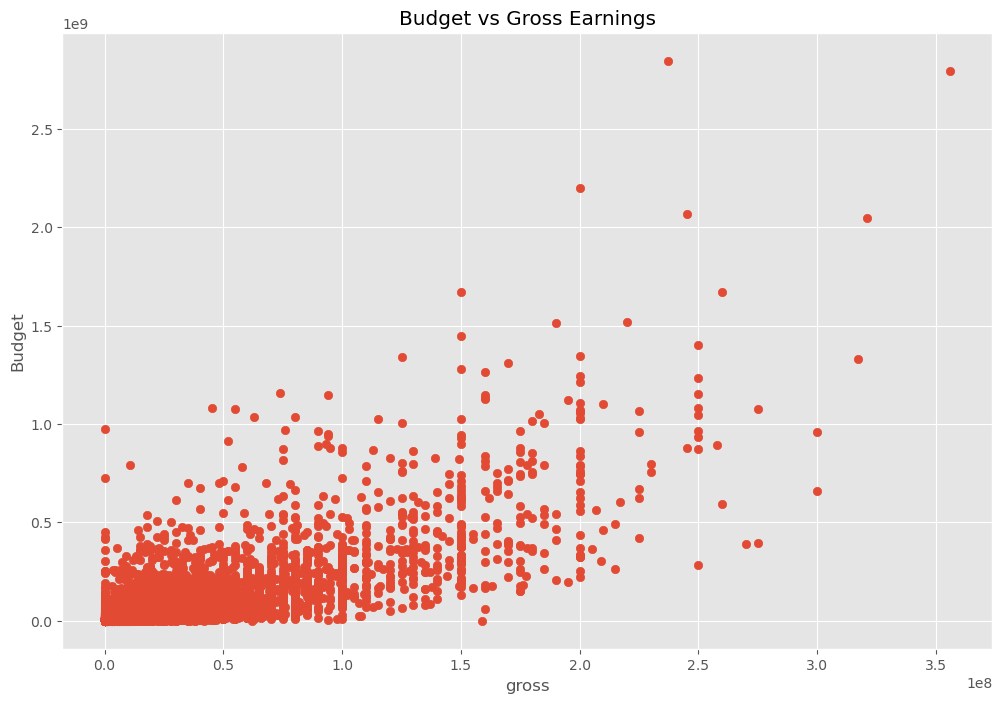

In [146]:
# Budget high correlation
# company high correlation

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('gross')
plt.ylabel('Budget')
plt.show()

In [147]:
df.sort_values(by=['budget'],inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017-12-15,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007-05-25,2007
7066,Justice League,PG-13,Action,2017,6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017-11-17,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Things Change,PG,Comedy,1988,7.0,3400.0,David Mamet,David Mamet,Don Ameche,United States,0,3527886,Columbia Pictures,100.0,1988-10-21,1988
5198,The Nines,R,Drama,2007,6.3,33000.0,John August,John August,Ryan Reynolds,United States,0,130880,Destination Films,100.0,2007-11-30,2007
5201,Rise: Blood Hunter,R,Action,2007,4.9,12000.0,Sebastian Gutierrez,Sebastian Gutierrez,Lucy Liu,United States,0,2850927,Mandate Pictures,97.0,2007-07-06,2007
1408,Clean and Sober,R,Drama,1988,6.7,5700.0,Glenn Gordon Caron,Tod Carroll,Michael Keaton,United States,0,8674093,Imagine Films Entertainment,124.0,1988-08-10,1988


<AxesSubplot:xlabel='budget', ylabel='gross'>

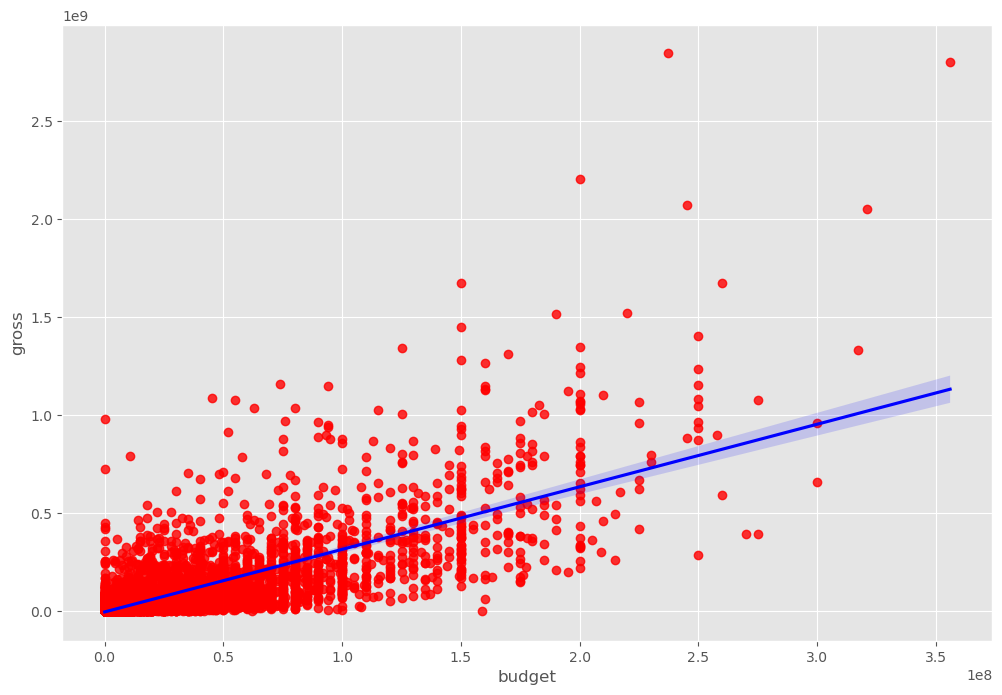

In [148]:
#Plot Budget vs Gross using seaborn
import seaborn as sns

sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [149]:
#Lets start looking at correlation
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.095097,0.219922,0.306792,0.260110,0.117651
score,0.095097,1.000000,0.409406,0.057549,0.187112,0.396445
votes,0.219922,0.409406,1.000000,0.485820,0.632273,0.308339
budget,0.306792,0.057549,0.485820,1.000000,0.749703,0.268235
gross,0.260110,0.187112,0.632273,0.749703,1.000000,0.244519
runtime,0.117651,0.396445,0.308339,0.268235,0.244519,1.000000


In [150]:
# There's high correlation between budget and gross


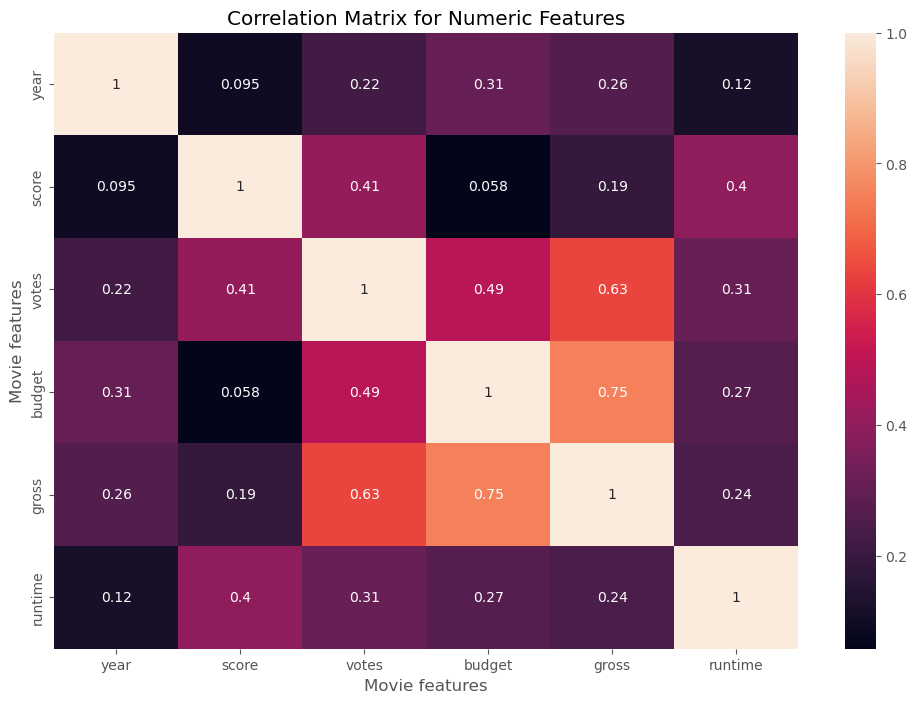

In [151]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [152]:
#look at company

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseddate,yearcorrect
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980
